
<img src="http://imgur.com/1ZcRyrc.png" style="float: right; margin: 20px; height: 30px">

## PROJECT 4 - PART 2 - GA TRAINING 
## DATA MODELLING

#### Group Members:
   ##### 1. Nor Hamizah Binti Mustaffa
   ##### 2. Normieza Binti Azhar
   ##### 3. Wan Eizham Afeef Bin Wan Ahmad Faizal

####  Domain : Health Insurance
####  Data Description : 
The data at hand contains medical costs of people characterized by certain attributes.
####  Attribute Information:

age: Age of primary beneficiary

sex: Insurance contractor gender, female / male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective
index of body weight (kg /  m2 ) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoker / Non - smoker

region: The beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance.

#### IMPORTING LIBRARIES/PACKAGES

In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

#### DATA LOADING

In [67]:
# Read data into a DataFrame.

# We use index_col to tell Pandas that the first column in the data has row labels.
data = pd.read_csv('insurance.csv')
data.head() 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### DATA EXPLORING

In [68]:
#info about the data
data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


- The data has 1338 rows including label with 7 features/columns/variables. 2 integer type, 2 float type and 3 object type(Strings in the column)

In [69]:
# Check for missing value in any colum
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

- The data has no missing values

In [70]:
# Check for missing value in any colum
data.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

- The data has no missing values

In [71]:
# Print the dataframes
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [72]:
# Datatypes of each column — each column is stored as an ndarray, which has a datatype
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [73]:
# Print the first 10 rows.
data.head(10)  

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [74]:
# Print the last five rows.
data.tail()            

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [75]:
# The row index (aka "the row labels" — in this case integers)
data.index 

RangeIndex(start=0, stop=1338, step=1)

In [76]:
# Column names (which is "an index")
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [77]:
# Number of rows and columns
data.shape

(1338, 7)

In [78]:
# Describe all columns, including non-numeric.
data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [79]:
# five point summary of the continuous attributes
data.describe()   

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### DATA VISUALIZATION

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'charges'}>]], dtype=object)

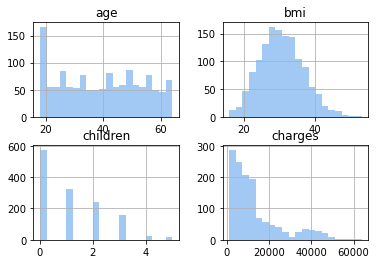

In [80]:
#visualize continouis variable/numerical variables.
data.hist(bins=20)

In [81]:
#check the skewness of the continious variables that do not have normal distribution
# Measure the skeweness of the required columns
Skewness = pd.DataFrame({'Skewness' : [stats.skew(data.age),stats.skew(data.bmi),stats.skew(data.charges)]},
                        index=['age','bmi','charges']) 
Skewness

,Skewness
age,0.055610
bmi,0.283729
charges,1.514180


#### SUMMARY: 
1. All 3 variables have positive skewness since the skewnes value is more than 0. 
2. The most positively skewed variable is charges followed by bmi and age.


In [82]:
# Let's construct a function that shows the summary and density distribution of a numerical attribute:
def summary(x):
    x_min = data[x].min()
    x_max = data[x].max()
    Q1 = data[x].quantile(0.25)
    Q2 = data[x].quantile(0.50)
    Q3 = data[x].quantile(0.75)
    print(f'5 Point Summary of {x.capitalize()} Attribute:\n'
          f'{x.capitalize()}(min) : {x_min}\n'
          f'Q1                    : {Q1}\n'
          f'Q2(Median)            : {Q2}\n'
          f'Q3                    : {Q3}\n'
          f'{x.capitalize()}(max) : {x_max}')

    fig = plt.figure(figsize=(16, 10))
    plt.subplots_adjust(hspace = 0.6)
    sns.set_palette('pastel')
    
    plt.subplot(221)
    ax1 = sns.distplot(data[x], color = 'r')
    plt.title(f'{x.capitalize()} Density Distribution')
    
    plt.subplot(222)
    ax2 = sns.violinplot(x = data[x], palette = 'Accent', split = True)
    plt.title(f'{x.capitalize()} Violinplot')
    
    plt.subplot(223)
    ax2 = sns.boxplot(x=data[x], palette = 'cool', width=0.7, linewidth=0.6)
    plt.title(f'{x.capitalize()} Boxplot')
    
    plt.subplot(224)
    ax3 = sns.kdeplot(data[x], cumulative=True)
    plt.title(f'{x.capitalize()} Cumulative Density Distribution')
    
    plt.show()

5 Point Summary of Age Attribute:
Age(min) : 18
Q1                    : 27.0
Q2(Median)            : 39.0
Q3                    : 51.0
Age(max) : 64


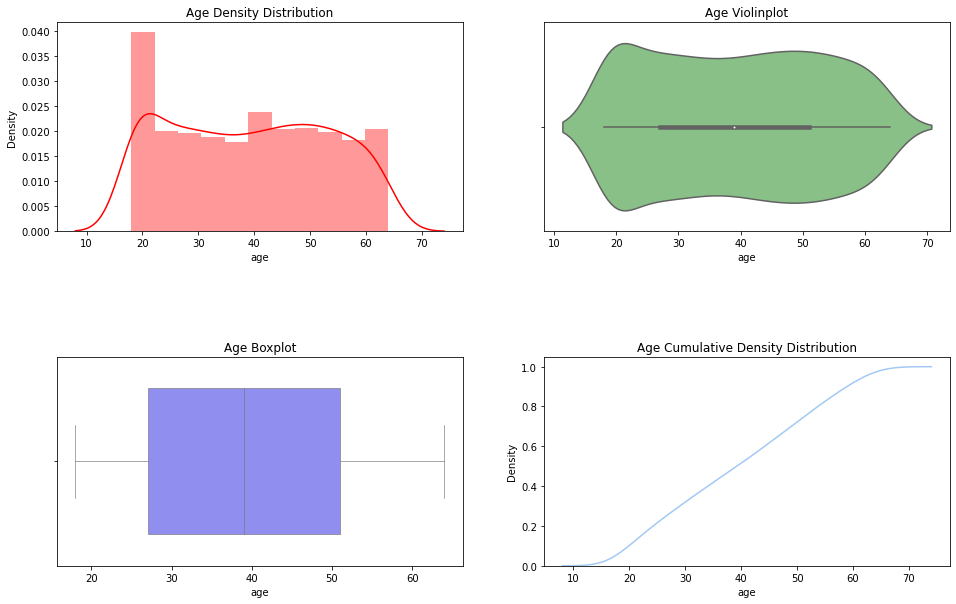

In [83]:
summary('age')

5 Point Summary of Bmi Attribute:
Bmi(min) : 15.96
Q1                    : 26.29625
Q2(Median)            : 30.4
Q3                    : 34.69375
Bmi(max) : 53.13


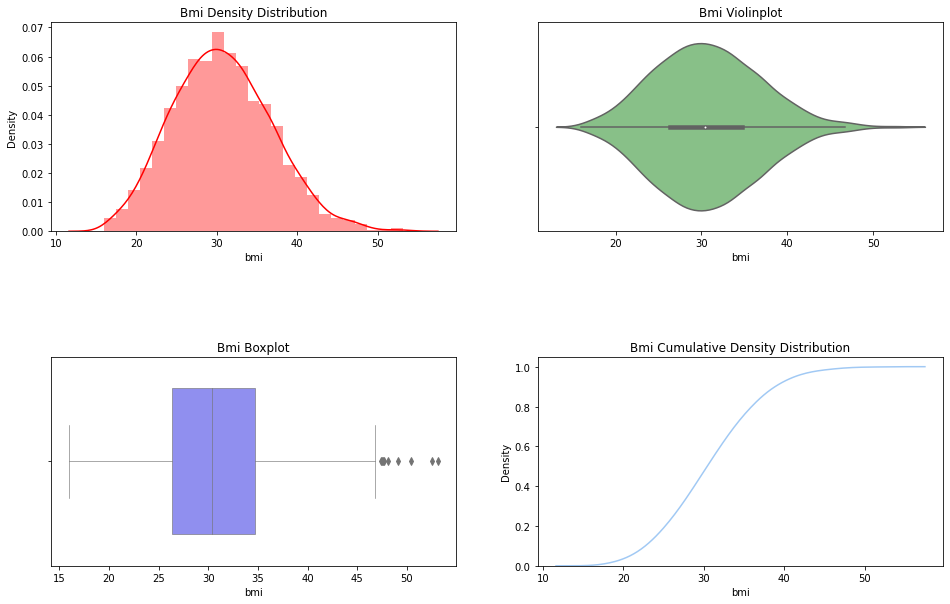

In [84]:
summary('bmi')

5 Point Summary of Charges Attribute:
Charges(min) : 1121.8739
Q1                    : 4740.28715
Q2(Median)            : 9382.033
Q3                    : 16639.912515
Charges(max) : 63770.42801


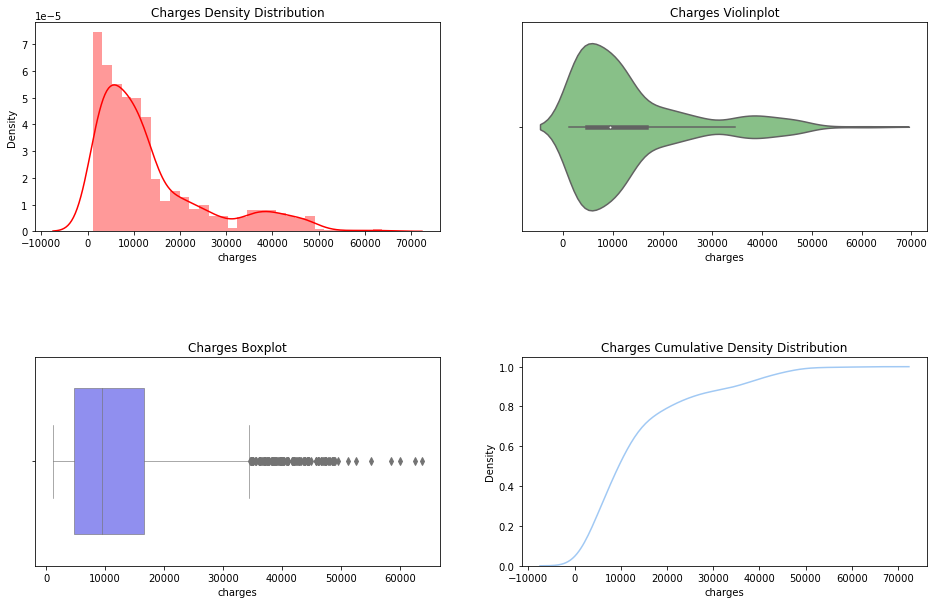

In [85]:
summary('charges')

5 Point Summary of Children Attribute:
Children(min) : 0
Q1                    : 0.0
Q2(Median)            : 1.0
Q3                    : 2.0
Children(max) : 5


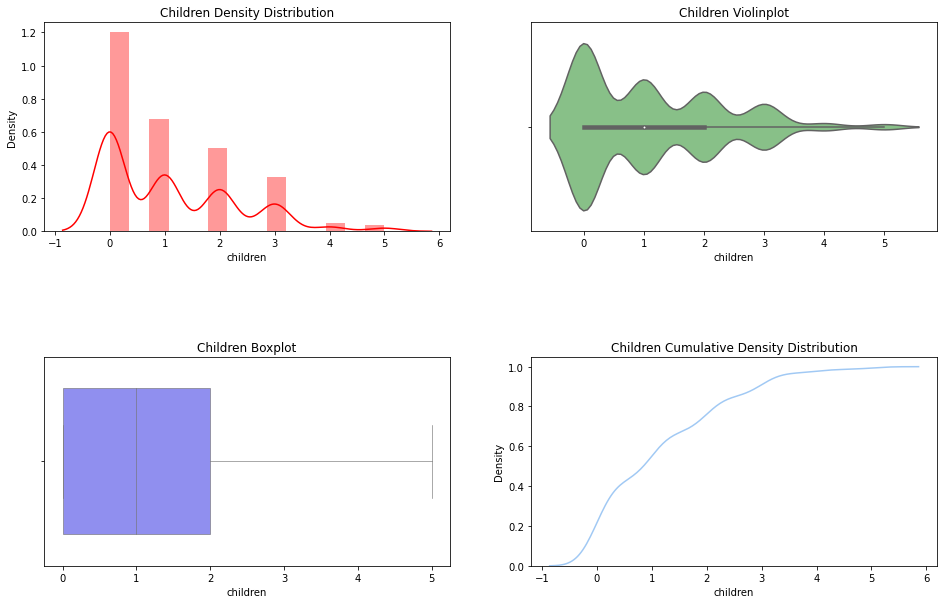

In [86]:
summary('children')

In [87]:
cat_cols = data.select_dtypes(include = 'object')
num_cols =data.select_dtypes(include = np.number)
print('Continuous variables are : ',num_cols.columns)
print('Categorical Columns are : ',cat_cols.columns)

Continuous variables are :  Index(['age', 'bmi', 'children', 'charges'], dtype='object')
Categorical Columns are :  Index(['sex', 'smoker', 'region'], dtype='object')


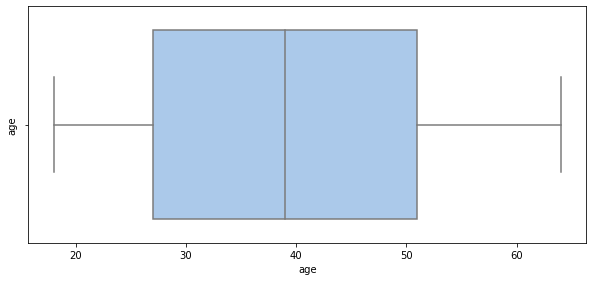

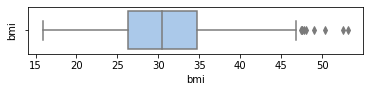

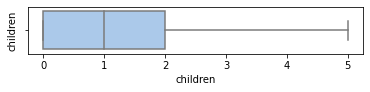

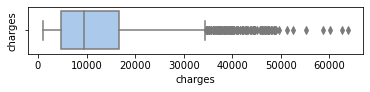

In [88]:
plt.figure(figsize=(10,20))
for i,col in enumerate(num_cols,1):
        plt.subplot(4,1,i)
        sns.boxplot(data[col])
        plt.ylabel(col)
        plt.show()

In [89]:
mean=data['bmi'].mean()
std=data['bmi'].std()
threshold = 3
outlier = [] 
for i in data['bmi']: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier.append(i) 
print('outlier in dataset is', outlier)

outlier in dataset is [49.06, 50.38, 52.58, 53.13]


<AxesSubplot:xlabel='sex', ylabel='count'>

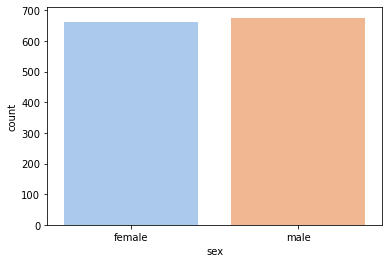

In [90]:

sns.countplot(x=data['sex'])

<AxesSubplot:xlabel='smoker', ylabel='count'>

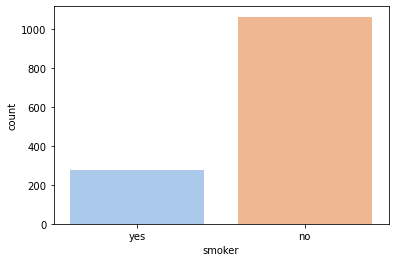

In [91]:

sns.countplot(x=data['smoker'])

<AxesSubplot:xlabel='region', ylabel='count'>

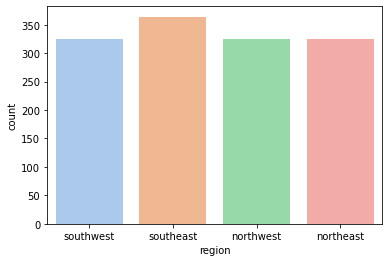

In [92]:
sns.countplot(x=data['region'])

<AxesSubplot:xlabel='children', ylabel='count'>

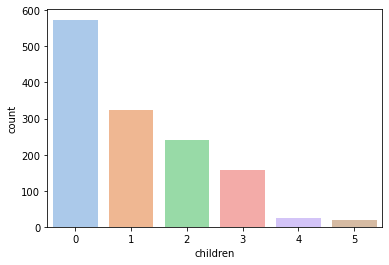

In [93]:
sns.countplot(x=data['children'])

In [94]:
import plotly.express as px
pie = data["region"].value_counts()
regions = pie.index
population = pie.values
fig = px.pie(data, values=population, names=regions)
fig.show()

In [95]:
data = data
figure = px.histogram(data, x = "sex", color = "smoker", title= "Number of Smokers")
figure.show()

In [96]:
## Replacing string values to numbers
repval = {'sex':{'male':0, 'female':1},
          'region':{'southwest':1, 'southeast':2,'northwest':3,'northeast':4},
          'smoker':{'yes':1, 'no':0}
         }

In [97]:
data = data.replace(repval)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


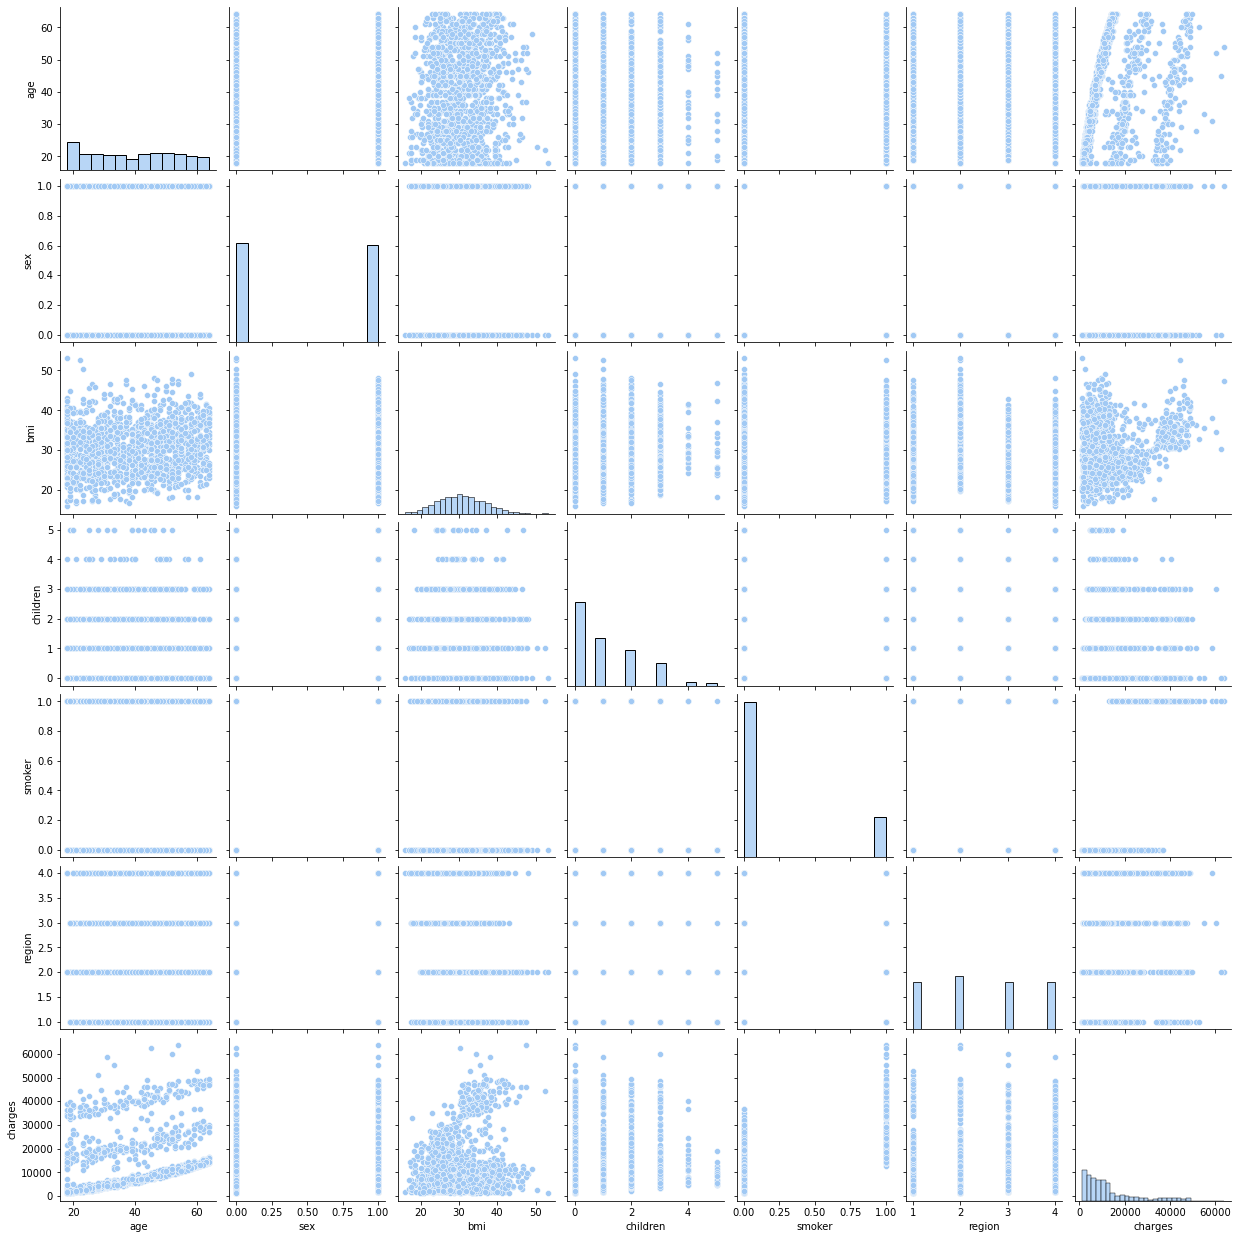

In [98]:
sns.pairplot(data)  #pairplot
plt.show()

In [99]:
corr = data.corr()
corr

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.020856,0.109272,0.042469,-0.025019,-0.002127,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,0.004588,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,-0.157566,0.198341
children,0.042469,-0.017163,0.012759,1.000000,0.007673,-0.016569,0.067998
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,0.002181,0.787251
region,-0.002127,0.004588,-0.157566,-0.016569,0.002181,1.000000,0.006208
charges,0.299008,-0.057292,0.198341,0.067998,0.787251,0.006208,1.000000


<AxesSubplot:>

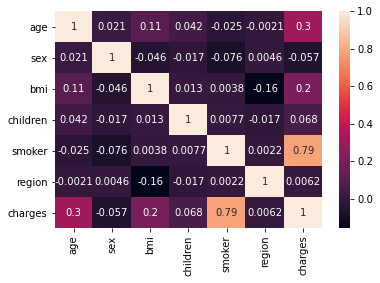

In [100]:
sns.heatmap(corr, annot=True)

Do charges of people who smoke differ significantly from the people who don't?¶


In [101]:
data.smoker.value_counts()

0    1064
1     274
Name: smoker, dtype: int64

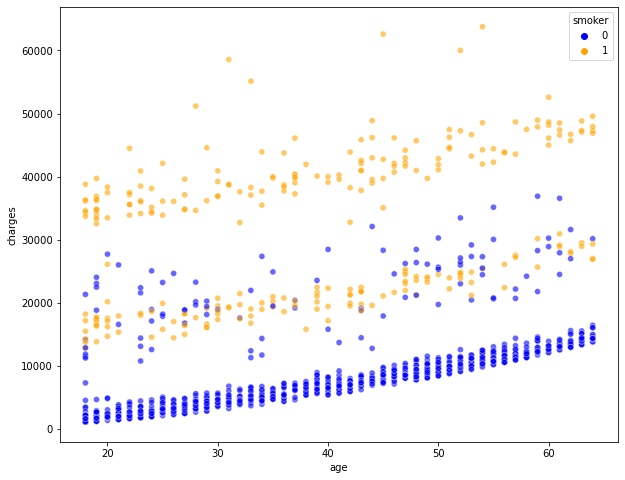

In [102]:
#Scatter plot to look for visual evidence of dependency between attributes smoker and charges accross different ages
plt.figure(figsize=(10,8))
sns.scatterplot(data.age, data.charges,hue=data.smoker,palette= ['blue','orange'] ,alpha=0.6)
plt.show()

Does bmi of males differ significantly from that of females?

In [103]:
data.sex.value_counts()   #Checking the distribution of males and females

0    676
1    662
Name: sex, dtype: int64

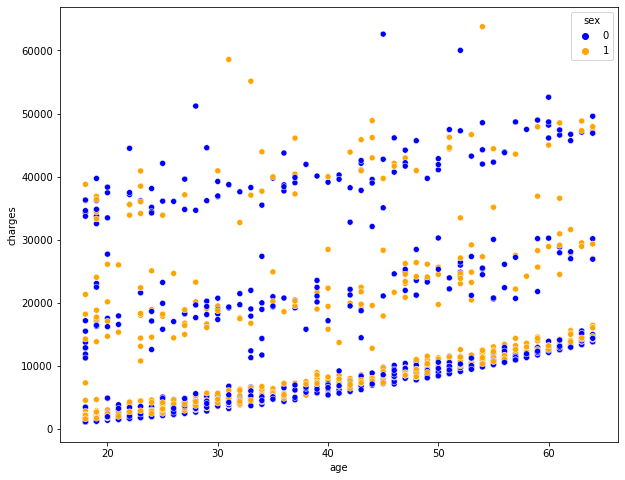

In [104]:
plt.figure(figsize=(10,8))
sns.scatterplot(data.age, data.charges,hue=data.sex,palette= ['blue','orange'] )
plt.show()

## PROJECT 4 - PART 3 - GA TRAINING 

## Predicting Medical Insurance Cost using Linear Regression Method

#### Introduction


#### Dataset Information
Inside the dataset, there are several attributes that can be a factor that affecting the cost of medical insurance. The attributes are:

Age: Age of primary beneficiary

Sex: Sex/gender of the beneficiary

BMI: Body Mass Index (BMI) of beneficiary; providing information of body in term of relationship between height and weight of a person

Children: Number of the dependents covered by medical insurance

Smoker: Status of beneficiary; smoker or non-smoker

Region: Beneficiaries residential area in US; northeast, southeast, southwest, northwest.

Charges: Individual medical cost billed by medical insurance

The dataset was taken from https://www.kaggle.com/mirichoi0218/insurance

### Evaluation Procedure #1: Train and Test

In [105]:
#Train/Test is a method to measure the accuracy of your model.
#It is called Train/Test because you split the the data set into two sets: a training set and a testing set.
#70% for training, and 30% for testing.
#Train the model means create the model.
#model = linear regresison model
#Test the model means test the accuracy of the model.

#Split Into Train/Test
#The training set should be a random selection of 70% of the original data.
#The testing set should be the remaining 30%.



In [106]:
data = pd.read_csv('insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [107]:
#check information about the dataset 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [108]:
#produce First 5 rows.

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [109]:
#produce Last 5 rows.

data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [110]:
#check for missing values in any column(s)

data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [111]:
#detailed description of the dataset 

data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [112]:
data.shape

(1338, 7)

#### Data Visualization

In [113]:
np.random.lognormal(size=1337)

array([2.07163079, 0.48966307, 0.23954002, ..., 2.85334252, 3.77420411,
       3.08285782])

(array([169., 273., 194., 163., 122.,  81.,  68.,  35.,  33.,  30.,  17.,
         26.,  24.,  14.,  12.,   6.,  10.,   8.,   3.,   5.,   4.,   5.,
          3.,   4.,   5.,   2.,   2.,   2.,   0.,   2.,   3.,   1.,   2.,
          1.,   2.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   1.,   1.,   1.]),
 array([1.04091066e-02, 3.29646933e-01, 6.48884759e-01, 9.68122586e-01,
        1.28736041e+00, 1.60659824e+00, 1.92583607e+00, 2.24507389e+00,
        2.56431172e+00, 2.88354954e+00, 3.20278737e+00, 3.52202520e+00,
        3.84126302e+00, 4.16050085e+00, 4.47973868e+00, 4.79897650e+00,
        5.11821433e+00, 5.43745216e+00, 5.75668998e+00, 6.07592781e+00,
        6.39516564e+00, 6.71440346e+00, 7.03364129e+00, 7.35287911e+00,
        7.67211694e+00, 7.99135477e+00, 8.31059259e+00, 8.62983042e+00,
        8.94906825e+00, 9.26830607e+00, 9.58754390e+00, 9.90678173e+00,
        1.02260196e+01, 1.05452574e+01, 1.08644952e+01, 1.11837330e+01,
        1.

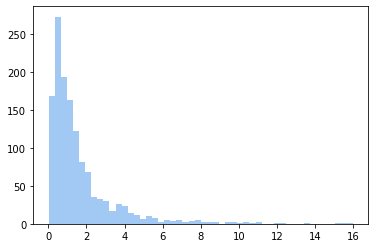

In [114]:
plt.hist(np.random.lognormal(size=1337), bins = 50)

Text(0.5, 1.0, 'Distribution of Charges')

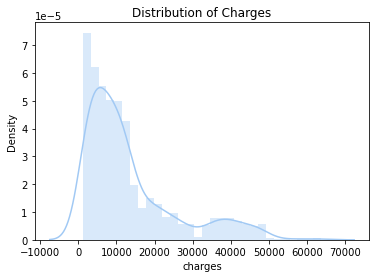

In [115]:
# Distribution of Charges

sns.distplot(data['charges'])
plt.title('Distribution of Charges')

#### Distribution of Dependent Variable

Text(0.5, 1.0, 'Distribution of Charges')

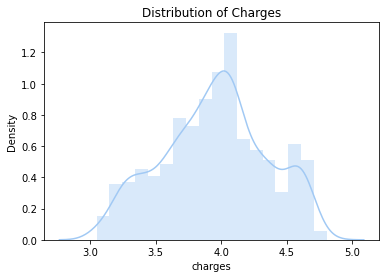

In [116]:
# Normalize Distribution of Charges using Natural Logarithm

sns.distplot(np.log10(data['charges']))
plt.title('Distribution of Charges')

#### Finding Independent Variable

In [117]:
## Replacing string values to numbers
repval = {'sex':{'male':0, 'female':1},
          'region':{'southwest':1, 'southeast':2,'northwest':3,'northeast':4},
          'smoker':{'yes':1, 'no':0}
         }

In [118]:
data = data.replace(repval)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


##### Gender against Charges

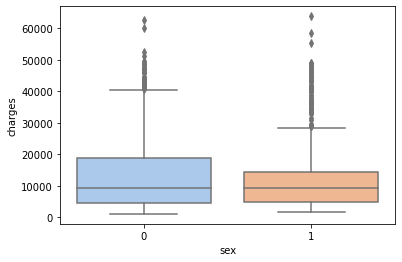

In [119]:
sns.boxplot(x = data['sex'], y = data['charges'])
plt.show()
#Both 

#### No. of Children against Charges

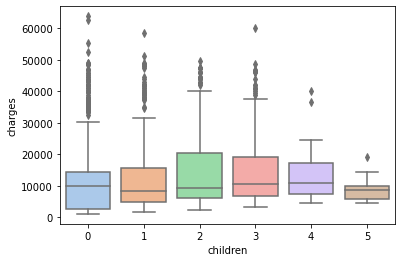

In [120]:
sns.boxplot(x = data['children'], y = data['charges'])
plt.show()

#### Smoker against Charges

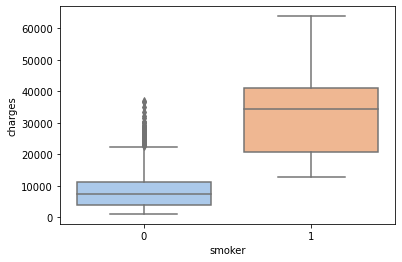

In [121]:
sns.boxplot(x = data['smoker'], y = data['charges'])
plt.show()

#### Region against Charges

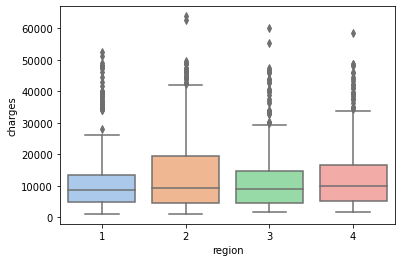

In [122]:
sns.boxplot(x = data['region'], y = data['charges'])
plt.show()

#### Covariance between Variables

From the boxplots above, there are few insights that can be retrieved:

Sex, Region, and Gender do not have much impact on medical insurance charges.
Those who are smoking does impact the medical insurance charges.
Those who have none and one dependent impacted less than those who have two or more dependents. However, those with five dependents show a smaller impact than others.
From here, we can deduce that Smokers, No. of Dependent, Age, and BMI are the independent variables to predict the medical insurance cost.

In [123]:
#Answer
data.mean()

age            39.207025
sex             0.494768
bmi            30.663397
children        1.094918
smoker          0.204783
region          2.484305
charges     13270.422265
dtype: float64

In [124]:
data.cov()

,age,sex,bmi,children,smoker,region,charges
age,197.401387,0.146559,9.362337,0.719303,-0.141903,-0.033024,5.087480e+04
sex,0.146559,0.250160,-0.141435,-0.010348,-0.015383,0.002536,-3.470145e+02
bmi,9.362337,-0.141435,37.187884,0.093795,0.009233,-1.061646,1.464730e+04
children,0.719303,-0.010348,0.093795,1.453213,0.003734,-0.022069,9.926742e+02
smoker,-0.141903,-0.015383,0.009233,0.003734,0.162969,0.000973,3.848667e+03
region,-0.033024,0.002536,-1.061646,-0.022069,0.000973,1.220771,8.306723e+01
charges,50874.802298,-347.014469,14647.304426,992.674197,3848.667032,83.067231,1.466524e+08


#### Correlation between Variables

In [125]:
data_corr = data.corr()
data_corr

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.020856,0.109272,0.042469,-0.025019,-0.002127,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,0.004588,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,-0.157566,0.198341
children,0.042469,-0.017163,0.012759,1.000000,0.007673,-0.016569,0.067998
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,0.002181,0.787251
region,-0.002127,0.004588,-0.157566,-0.016569,0.002181,1.000000,0.006208
charges,0.299008,-0.057292,0.198341,0.067998,0.787251,0.006208,1.000000


In [126]:
#The increase 1 unit of age will increase 0.299008 of charges (statistical explaination)

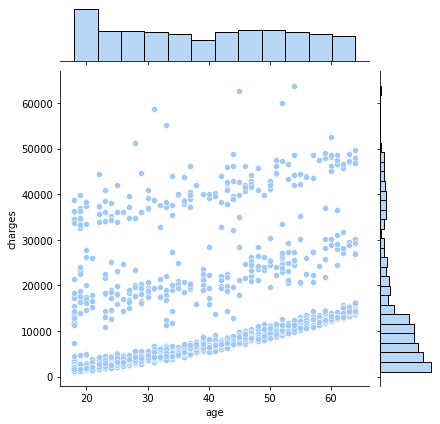

In [127]:
# Correlation betweeen 'charges' and 'age' 
sns.jointplot(x=data['age'],y=data['charges'])

#### Summary: 
As the Age goes up, Charges for health insurance increasing

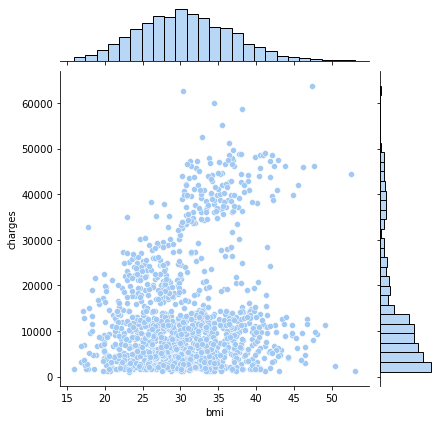

In [128]:
# Correlation betweeen 'charges' and 'age' 
sns.jointplot(x=data['bmi'],y=data['charges'])

As the Age goes up, Charges for health insurance increasing

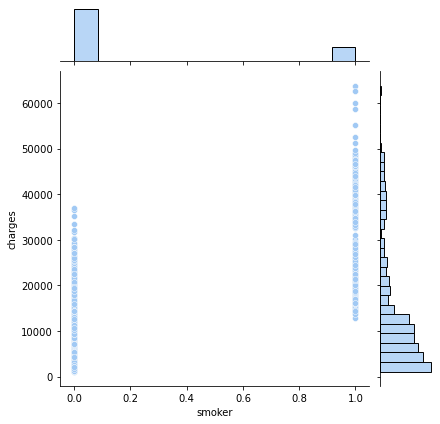

In [131]:
# Correlation betweeen 'charges' and 'age' 
# smoker = 1 , non-smoker = 0
sns.jointplot(x=data['smoker'],y=data['charges'])

#### Summary
charges for smokers are higher than non-smokers

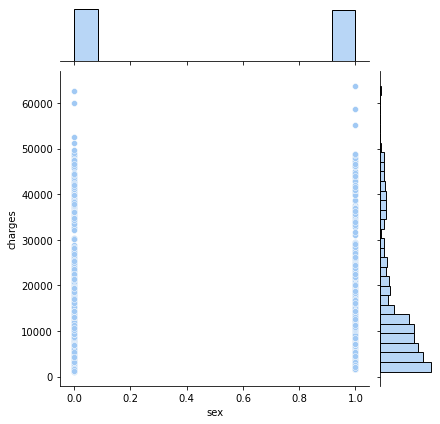

In [132]:
# Correlation betweeen 'charges' and 'age' 
sns.jointplot(x=data['sex'],y=data['charges'])

<AxesSubplot:>

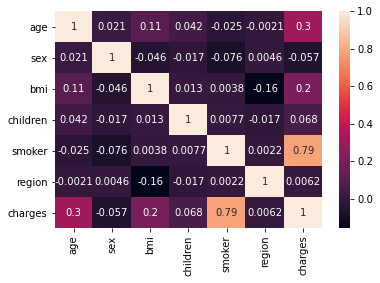

In [133]:
sns.heatmap(data_corr, annot=True)

### Data Modelling
#### Building Machine Learning Model

#### Features Preparation

In [134]:
#create a list of features/variables

feat_cols = ['age','smoker','children','bmi']

In [135]:
#create variable X and Y 

X = data[feat_cols]
Y = data['charges']

In [136]:

#check shapes of X and Y

X.shape, Y.shape

((1338, 4), (1338,))

#### Feature Selection
#### Data Split (Train-Test-Split)

In [137]:
#import related librar(ies)

from sklearn.model_selection import train_test_split

In [138]:
#Define data split (80:20 ratio)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state = 30)

In [139]:
#check shape before and after splitting 

print("Before split: ",X.shape,",", Y.shape)
print("After split [Train]: ",X_train.shape,",", Y_train.shape)
print("After split [Test]: ",X_test.shape,",", Y_test.shape)

Before split:  (1338, 4) , (1338,)
After split [Train]:  (1070, 4) , (1070,)
After split [Test]:  (268, 4) , (268,)


#### Building Linear Regression Model

In [140]:
#import related librar(ies)

from sklearn.linear_model import LinearRegression 
linreg = LinearRegression()

In [141]:
#train the dataset using the LR model 
# plot training dataset and build best linear regression fit line
linreg.fit(X_train, Y_train)

LinearRegression()

In [142]:
#apply trained model to make prediction on test set

Y_pred = linreg.predict(X_test)

In [143]:
# y = mx + c
# Our model(linear regression) is 74.15% accurate. Therefore, we can proceed with further analysis.
print(linreg.intercept_)
print(linreg.coef_)
print(linreg.score(X_test,Y_test))

-12107.678845236489
[  267.52141139 23635.48654945   413.18844393   311.51627695]
0.7612151089549922


In [144]:
# group items into a single tuple
list(zip(feat_cols, linreg.coef_))

[('age', 267.52141138916596),
 ('smoker', 23635.48654945026),
 ('children', 413.18844393486734),
 ('bmi', 311.51627694542185)]

Interpreting the coefficients:

Holding all other features fixed, a 1-unit increase in age is associated with cost increase of 256.043 medical insurance charge.
Holding all other features fixed, a 1-unit increase in smoker is associated with cost increase of 23784.355 medical insurance charge.
Holding all other features fixed, a 1-unit increase in children is associated with cost of 541.906 medical insurance charge.
Holding all other features fixed, a 1-unit increase in bmi is associated with cost of 325.879 medical insurance charge.

In [146]:
#  standard scaling
#  ML algorithm works better when features are relatively on a similar scale and close to Normal Distribution. 
# SCALE - It means to change the range of values but without changing the shape of distribution. Range is often set to 0 to 1.
from sklearn.preprocessing import StandardScaler

# creating a standard scaler
sc = StandardScaler()

# feeding independents sets into the standard scaler
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#### Evaluation Metrics for Regression Problems

Here are three common evaluation metrics for regression problems:

**Mean absolute error (MAE)** is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean squared error (MSE)** is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root mean squared error (RMSE)** is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [147]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


# creating the model
linreg = LinearRegression()

# feeding the training data to the model
linreg.fit(X_train, Y_train)

# predicting the test set results
y_pred = linreg.predict(X_test)

# calculating the mean squared error
mse = np.mean((Y_test - Y_pred)**2, axis = None)
print("MSE :", mse)

# Calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

# Calculating the r2 score
r2 = r2_score(Y_test, Y_pred)
print("r2 score :", r2)

MSE : 36833293.75507092
RMSE : 6069.043891344906
r2 score : 0.7612151089549922


In [148]:
Y_test

338    41919.09700
620     3659.34600
965     4746.34400
128    32734.18630
329     9144.56500
          ...     
580    12913.99240
786    12741.16745
321    24671.66334
903     8125.78450
613     6753.03800
Name: charges, Length: 268, dtype: float64

In [149]:
Y_pred

array([35379.04246294,  6112.76303646,  6110.85010254, 26448.95641647,
       13236.0819109 ,  6779.02528234,  4900.45363941,  9996.37897681,
       33479.14852611, 11607.28883775,  8245.55624168, 10439.81350428,
       35375.08810216, 11749.3840963 ,  1585.92045271, 35810.9372401 ,
       12171.8440041 ,  9457.85796043, 29025.22326106, 11116.18641203,
        1646.28353993,  8913.36839065,  7953.14844069, 11087.74012608,
       33504.4796493 , 39226.01438938, 14734.99816038,  3646.7095617 ,
       11228.75397042, 14585.80614404,  2007.33385885, 31171.13335393,
        1680.57756465, 14820.18896936, 12946.42624184,  9186.37450996,
        2219.88331055,  7203.91688208,   936.0264285 ,  8543.39008275,
        7129.64102045, 33989.39086138,  2748.313221  , 14269.57801104,
       10513.39473785, 30591.56502992,  5623.72927185,  3330.41160361,
        3071.54453141,  5376.40194997, 11351.46710322, 13176.16775661,
       12242.78204272,  1620.21447743, 11244.32978426,  7709.45923895,
      

#### Random Forest



In [150]:
from sklearn.ensemble import RandomForestRegressor

# creating the model
linreg = RandomForestRegressor(n_estimators = 40, max_depth = 4, n_jobs = -1)

# feeding the training data to the model
linreg.fit(X_train, Y_train)

# predicting the test set results
Y_pred = linreg.predict(X_test)

# calculating the mean squared error
mse = np.mean((Y_test - Y_pred)**2, axis = None)
print("MSE :", mse)

# Calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

# Calculating the r2 score
r2 = r2_score(Y_test, Y_pred)
print("r2 score :", r2)

MSE : 21465690.43688641
RMSE : 4633.108075243487
r2 score : 0.860841048148942


In [160]:
y_predict = linreg.predict(X)

In [161]:
from sklearn import metrics

print(metrics.mean_squared_error(Y, y_predict))

36776121.98515418


In [162]:
from sklearn import model_selection
kf = model_selection.KFold(n_splits=2, shuffle=True)

In [163]:
mse_values = []
scores = []
n = 0

print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in kf.split(X, Y):
    linreg = LinearRegression().fit(X.iloc[train_index], Y.iloc[train_index])
    
    mse_values.append(metrics.mean_squared_error(Y.iloc[test_index], linreg.predict(X.iloc[test_index])))
    scores.append(linreg.score(X, Y))
    
    n += 1
    
    print('Model {}'.format(n))
    print('MSE: {}'.format(mse_values[n-1]))
    print('R2: {}\n'.format(scores[n-1]))


print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of MSE for all folds: {}'.format(np.mean(mse_values)))
print('Mean of R2 for all folds: {}'.format(np.mean(scores)))

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 34632475.87277331
R2: 0.7490868697041436

Model 2
MSE: 39297045.42168409
R2: 0.7490077603897971

~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 36964760.6472287
Mean of R2 for all folds: 0.7490473150469703


In [151]:
Y_test

338    41919.09700
620     3659.34600
965     4746.34400
128    32734.18630
329     9144.56500
          ...     
580    12913.99240
786    12741.16745
321    24671.66334
903     8125.78450
613     6753.03800
Name: charges, Length: 268, dtype: float64

In [152]:
Y_pred

array([44825.09658222,  5444.70619741,  5853.42527982, 16813.87452172,
       10342.32970624,  5595.61526278,  2865.88640897, 10662.12276742,
       44014.67081093, 13253.24032983,  6654.01201559, 10247.88708732,
       45604.4371095 , 13370.48782936,  2865.88640897, 24735.41505652,
       10301.36879865,  9120.85873633, 17388.97716277,  9753.04849665,
        2865.88640897,  6547.72425451, 10168.03200697,  7951.84176169,
       25874.95320375, 45854.69653465, 14283.21740007,  4975.51150932,
        6983.12415135, 10534.75100734,  5219.24993064, 37301.76304716,
        2950.20938119, 10479.80769685, 13320.19373546,  6547.72425451,
        2865.88640897,  6509.15854943,  2865.88640897,  5981.03333042,
        6550.18508206, 23795.19884561,  4128.52187486, 13320.19373546,
        6657.54926128, 38569.03351097,  6550.18508206,  2865.88640897,
        3874.47320383,  6644.05771404,  7094.51778497,  9955.47541444,
       13320.19373546,  2865.88640897,  6983.12415135,  7362.27059198,
      

#### Summary

Performance:
- Linear Regression : 76.82%
- Random Forest : 86.08%

- The results shows  that Random forest model offers the best efficiency, with an RMSE value of 4633.108,  an  MSE  value of 
- 21465690.436,  and an  accuracy of 86.08% in comparison with Linear regression model with RMSE of 6069.044, MSE value of, 36833293.755, and an accuracy of 76.12%.

- Therefore, Random Forest Model can be used in the estimation of insurance cost with better performance than linear regression model. 

- Predicting/forecasting insurance costs based on certain  factors  help  insurance  policy  providers  to  attract consumers  and  save  time  in  formulating  plans  for  every individual. 

- Machine learning can significantly minimize these individual efforts in policymaking.

- ML models can do cost calculation in  a short period of time, while a human being would be taking a long time to perform the same task. This will help businesses improve their profitability.  The ML models can also manage enormous amounts of data.